<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset


In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
#Vemos qué variables hay en nuestro dataset.
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 1 - Análisis descriptivo

Para este ejericio, decidimos trabajar específicamente con un grupo específico dentro de la muestra: las personas que trabajan en Data Science ¿Por qué este grupo? Porque, como futuras y futuros cientistas de datos, queremos saber si hay información suficiente para ayudarnos a decidir en qué lenguaje deberíamos enfocar nuestros aprendizames más relevantes. 

A lo largo del ejercicion, mostraremos cómo identificamos dos roles relacionados a este grupo de nuestro interés y profundizamos sobre ellos. Así, nuestra pregunta es: 

**¿Cuáles son los lenguajes de programación asociados a los mejores salarios en el área de Data Science?**

Elegimos realizar un abordaje basado en las visualizaciones, por lo cual decidimos presentar varias de ellas. 


In [5]:
# a las columnas necesarias (lenguajes y salarios) sumamos la columna de rol en el trabajo para poder filtrar nuestro grupo de interés
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_role']
relevant_columns

['tools_programming_languages', 'salary_monthly_NETO', 'work_role']

### Filtrado del grupo de trabajadores/as que nos interesa

A continuación vemos una lista de los principales roles y seleccionamos los que nos interesa.
Notamos que **casi la mitad de la muestra tiene roles con frecuencias iguales o menores a 4**, que no estamos abordando. 
Es posible que las personas hayan definido de un modo muy diferente roles laborales similares y que, en realidad, mayor cantidad de personas realizaran los trabajos que nos interesan. Sin embargo, el esfuerzo para la exploración y recodificación de esos datos excede los alcances de este trabajo.

**De cualquier modo, debemos tener en cuenta que posiblemente estemos trabajando con solo una porción de las personas que realizan los trabajos que nos interesan**

In [10]:
#Vamos a ver qué roles laborales hay en nuestro df. Pedimos una lista de 30 porque queremos un panorama de los más frecuentes.
role_count = df.work_role.value_counts()
role_count[:30]

Developer                         2402
SysAdmin / DevOps / SRE            689
Technical Leader                   399
QA / Tester                        254
Manager / Director                 231
HelpDesk                           198
Project Manager                    193
Architect                          175
Data Scientist / Data Engineer     140
Consultant                         139
BI Analyst / Data Analyst          135
Networking                         132
Business Analyst                   111
UX                                  95
Infosec                             85
Recruiter / HR                      55
Designer                            54
DBA                                 52
Product Manager                     50
Scrum Master                        48
VP / C-Level                        36
Sales / Pre-Sales                   27
Middleware                          22
Finance                             14
Storage / Backup                    10
Technical Writer         

En la celda anterior encontramos dos roles que nos interesan: **Data Scientist / Data Engineer y BI Analyst / Data Analyst**.
Si bien refieren a distintos trabajos, con distintos enfoques y niveles de especificidad, ambos perfiles **aplican técnicas de data science y trabajan sobre datos**. 

Hay otros roles que también podrían trabajar principalmente sobre datos, pero no podemos estar seguras sobre el rol (por ejemplo: Business Analyst) y es posible que el perfil se base más en habilidades distintas de las técnicas. 

In [11]:
#En función de lo anterior, cremos un nuevo df donde ya seleccionamos los roles que nos interesan
interesting_role = ["Data Scientist / Data Engineer", "BI Analyst / Data Analyst"]
df_role = df[df.work_role.isin(interesting_role)]
df_role[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
19,Hombre,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,1.0,1.0,0,Terciario,Completado,...,Jamás,Heterosexual,NaN,No,201-500,Producto basado en Software,8,6,"Capacitaciones y/o cursos, Clases de gimnasia ...","Medallia, Jamp, Wildlife Studios, MongoDB"
33,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,12.0,4.0,0.0,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,No,11-50,Producto basado en Software,5,3,"Clases de idiomas, Horarios flexibles",NaN
57,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,11.0,1.0,1.0,3,Universitario,Completado,...,En un trabajo anterior,Heterosexual,NaN,No,11-50,Servicios / Consultoría de Software / Digital,9,8,"Capacitaciones y/o cursos, Vacaciones flexible...",NaN
82,Hombre,40,Argentina,Ciudad Autónoma de Buenos Aires,4.0,0.0,0.0,0,Posgrado,Incompleto,...,Jamás,Heterosexual,NaN,NaN,51-100,Servicios / Consultoría de Software / Digital,10,10,"Capacitaciones y/o cursos, Clases de gimnasia ...","Data IQ, Rocking Data"
199,Hombre,25,Argentina,Ciudad Autónoma de Buenos Aires,2.0,2.0,0.0,2,Universitario,Completado,...,Jamás,Heterosexual,NaN,NaN,51-100,Servicios / Consultoría de Software / Digital,9,10,"Abono de Internet, Capacitaciones y/o cursos, ...",NaN


### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [12]:
#acá se observa la principal dificultad que tenemos con este data set: muchas personas usan más de un lenguaje de programación
#además, estos son strings.
df_role.tools_programming_languages[:3]

19    Python, Scala, SQL
33    Bash/Shell, Python
57                   SQL
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

**sobre este código no trabajamos, solo lo corrimos sobre nuestro df filtrado por work_role**


In [14]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_role.loc[:, 'cured_programming_languages'] = df_role.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_role.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_role[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
19,python,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
19,scala,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
19,sql,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
33,bash/shell,"Bash/Shell, Python",168000.0,Data Scientist / Data Engineer,"[bash/shell, python]"
33,python,"Bash/Shell, Python",168000.0,Data Scientist / Data Engineer,"[bash/shell, python]"


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [17]:
#Ahora veo cuáles son los lenguajes que más usa nuestro grupo de interés
language_count = df_lang.programming_language.value_counts()
language_count[:30]

sql           182
python        168
r              48
bash/shell     37
javascript     33
java           28
html           26
vba            18
c#             17
scala          17
css            17
.net           15
c++            10
php            10
matlab          5
go              5
ruby            4
c               3
typescript      3
kotlin          3
abap            3
cobol           2
ninguno         2
dax             2
dart            2
qlik            2
perl            1
qlikview        1
qvx             1
m               1
Name: programming_language, dtype: int64

Los **3 lenguajes más utilizados** por este grupo coiniden con los que muchos blogs sobre actualidad y tecnología señalan como los más demandados para este perfil en particular, siendo Python es más utilizado.
Por eso, vamos a quedarnos con estos tres lenguajes que consideraremos como lenguajes relevantes: **Python, R y sql**

In [18]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#voy a elegir los lenguajes más relevantes para este grupo. Los tres que se mencionan en varios artículos revisados,
#son también los que tienen una frecuencia mayor en este grupo
interesting_languages = ["python", "r", "sql"]
df_curado = df_lang[df_lang.programming_language.isin(interesting_languages)]
df_curado[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
19,python,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
19,sql,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
33,python,"Bash/Shell, Python",168000.0,Data Scientist / Data Engineer,"[bash/shell, python]"
57,sql,SQL,75000.0,BI Analyst / Data Analyst,[sql]
82,python,"Python, R, Qlik",34500.0,BI Analyst / Data Analyst,"[python, r, qlik]"


In [124]:
#Acá exploramos un poco más el lenguaje que usan según el rol que desempeñan. 
#tabla de frecuencias

pd.crosstab(index=df_curado['programming_language'],
            columns=df_curado['work_role'], margins=True)



work_role,BI Analyst / Data Analyst,Data Scientist / Data Engineer,All
programming_language,,,
python,42,126,168
r,21,27,48
sql,95,87,182
All,158,240,398


In [125]:
#o se puede ver la tabla de frecuencias relativas en función del total que se dedican a cada rol.

#vemos que "BI Analyst / Data Analyst" usan más Sql y los "Data Scientist / Data Engineer" usan más Python. 

pd.crosstab(index=df_curado['programming_language'],
            columns=df_curado['work_role'], margins=True).apply(lambda r: r/r.sum() *100,
                                axis=0)

work_role,BI Analyst / Data Analyst,Data Scientist / Data Engineer,All
programming_language,,,
python,13.291139,26.250,21.105528
r,6.645570,5.625,6.030151
sql,30.063291,18.125,22.864322
All,50.000000,50.000,50.000000


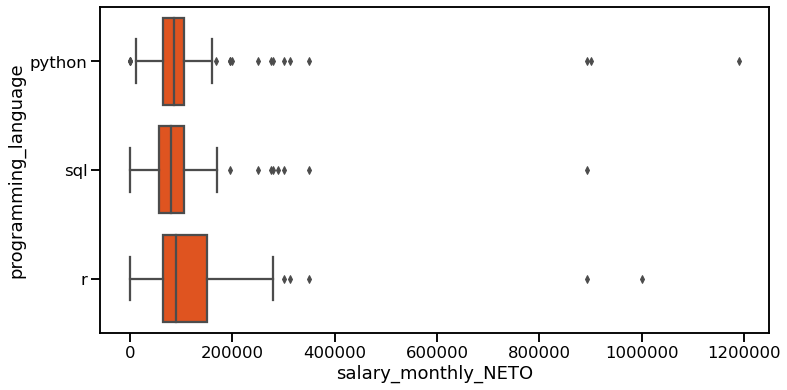

In [20]:
#hacemos una primera exploración sobre la distribución del salario en cada uno de los tres grupos.
#Esta nos va a servir para identificar si hay outliers. 
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_curado, x=df_curado.salary_monthly_NETO, y=df_curado.programming_language,
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

Efectivamente encontramos que, por encima de los 400 mil pesos hay varios casos atípicos. También tenemos algunos casos atípicos muy cerca del cero, así que tendremos que tomar decisiones sobre qué hacer con ellos.

También, empezamos a observar uno de los problemas que tiene nuestro df: debido a que algunas personas programan en más de un lenguaje, hay casos siendo contabilizados en más de un grupo, de hecho **¿no es llamativo que haya un outlier ubicado en exactamente la misma posición en términos de su salario en los tres grupos?**

Esto es importante porque nuestras conclusiones tienen que ser cautelosas, sobre todo si no encontramos diferencias entre los grupos. Una hipótesis alternativa es que no sea el lenguaje en sí el que se asocia al salario, sino la cantidad de lenguajes que una persona maneja. **pero eso lo dejamos para otro práctico**

Para aislar la relación de salario con lenguaje deberíamos trabajar **solo con los casos que usan UN SOLO lenguaje**. En nuestro grupo eso no es posible, dado que nos dejaría con pocos casos. 

Así que avanzamos, interpretamos con cautela y vemos a dónde nos lleva....  

In [25]:
#Acá vamos a filtrar los outliers.
#para el límite superior seguimos un criterio estadístico y quitamos aquellos casos que están por encima del percentil .98
#en este caso, el percentil 98 es 350000
max_limit = df_curado["salary_monthly_NETO"].quantile(.98)
print(max_limit)

350000.0


In [128]:
# Para el caso de los outilers por debajo, si seguíamos el mismo criterio podíamos estar eliminando casos de personas que efectivamente
#cobren mcarcadamente menos (por ser un trabajo a tiempo parcial, freelance, etc).
#el criterio seguido fue eliminar aquellos casos que solo pueden ser interpretados como errores de carga.
#vemos que hay 13 casos que tienen un salario igual o menos a 38000 pesos y son los que serán removidos en próximos análisis
min_limit = 10000
print(min_limit)
salary = list(df_curado["salary_monthly_NETO"])
salary.sort()
salary

10000


[39.5,
 64.0,
 64.0,
 64.0,
 67.0,
 69.0,
 69.0,
 87.0,
 87.0,
 185.0,
 185.0,
 185.0,
 3800.0,
 12000.0,
 23000.0,
 34500.0,
 34500.0,
 34500.0,
 36900.0,
 38000.0,
 38000.0,
 38700.0,
 39063.0,
 41000.0,
 41000.0,
 42000.0,
 42000.0,
 42000.0,
 43300.0,
 43800.0,
 44500.0,
 44500.0,
 44820.0,
 45000.0,
 45000.0,
 45000.0,
 45710.0,
 46000.0,
 46000.0,
 46000.0,
 46000.0,
 47000.0,
 47700.0,
 48000.0,
 49971.0,
 50000.0,
 51000.0,
 54000.0,
 55000.0,
 55000.0,
 56000.0,
 56000.0,
 56000.0,
 56000.0,
 56900.0,
 56900.0,
 57000.0,
 57000.0,
 58000.0,
 58000.0,
 60000.0,
 60000.0,
 61500.0,
 62933.86,
 62933.86,
 62933.86,
 63000.0,
 63080.0,
 64000.0,
 64000.0,
 65000.0,
 65000.0,
 65000.0,
 67500.0,
 68000.0,
 68000.0,
 68000.0,
 68000.0,
 68000.0,
 68000.0,
 68000.0,
 71000.0,
 71000.0,
 71000.0,
 71000.0,
 71200.0,
 71200.0,
 71986.14,
 72000.0,
 72000.0,
 72950.0,
 75000.0,
 75000.0,
 75000.0,
 75000.0,
 75000.0,
 75000.0,
 78000.0,
 79000.0,
 79000.0,
 80000.0,
 80000.0,
 80000.0,


In [29]:
#aquí nuestro df filtrado, sin outilers
df_curado2 = df_curado[(df_curado["salary_monthly_NETO"]<=max_limit) & (df_curado["salary_monthly_NETO"]>=min_limit)]
df_curado2[:10]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
19,python,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
19,sql,"Python, Scala, SQL",68000.0,Data Scientist / Data Engineer,"[python, scala, sql]"
33,python,"Bash/Shell, Python",168000.0,Data Scientist / Data Engineer,"[bash/shell, python]"
57,sql,SQL,75000.0,BI Analyst / Data Analyst,[sql]
82,python,"Python, R, Qlik",34500.0,BI Analyst / Data Analyst,"[python, r, qlik]"
82,r,"Python, R, Qlik",34500.0,BI Analyst / Data Analyst,"[python, r, qlik]"
209,sql,SQL,68000.0,BI Analyst / Data Analyst,[sql]
274,sql,"C++, Java, SQL",34500.0,BI Analyst / Data Analyst,"[c++, java, sql]"
308,python,"Bash/Shell, Python, SQL",103330.0,Data Scientist / Data Engineer,"[bash/shell, python, sql]"
308,sql,"Bash/Shell, Python, SQL",103330.0,Data Scientist / Data Engineer,"[bash/shell, python, sql]"


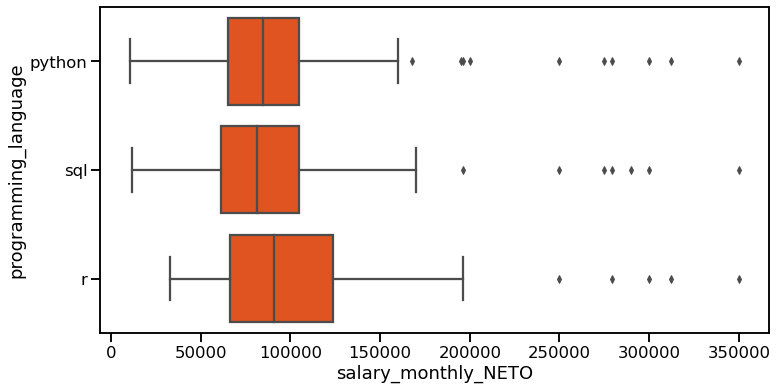

In [33]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_curado2, x=df_curado2.salary_monthly_NETO, y=df_curado2.programming_language,
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

En el plot anterior podemos ver todavía algunos **casos atípicos**, pero no podemos suponer que estos no sean casos válidos, es muy posible que algunas personas tengan salarios en esos valores y, eliminarlos, atentaría justamente contra nuestro objetivo.

Las diferencias observadas en este gráfico **parecen pequeñas** 

La **media de salario neto de las personas que programan en R es ligeramente superior** a la de los otros dos lenguajes y, además, la dispersión relativamente mayor. Esta dispersión **se puede ver afectada por el tamaño del grupo más pequeño**, lo cual también podría ser responsable de que el peso de los outliers sobre la media sea mayor. 


Por eso, **es necesario seguir explorando la distribución de estos datos**. 

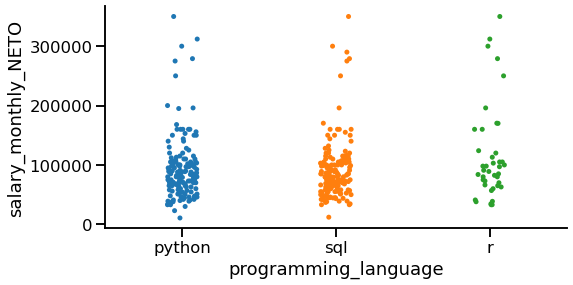

In [34]:
#esta forma de visiualización nos permite ver mejor la densidad de casos en cada valor y notar también el tamaño diferente de los grupos

seaborn.catplot(data=df_curado2, y='salary_monthly_NETO',
                x='programming_language', height=4, aspect=2)

### ¿Cómo podemos visualizar mejor la distribución de los salarios en cada grupo?

Vamos a hacer dos cosas:
 - Vamos a graficar las distribuciones incluyendo la media y la mediana para cada grupo
 - Vamos a superponer esas distribuciones en un mismo gráfico para identificar las diferencias


C:\Users\Dany\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dany\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dany\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

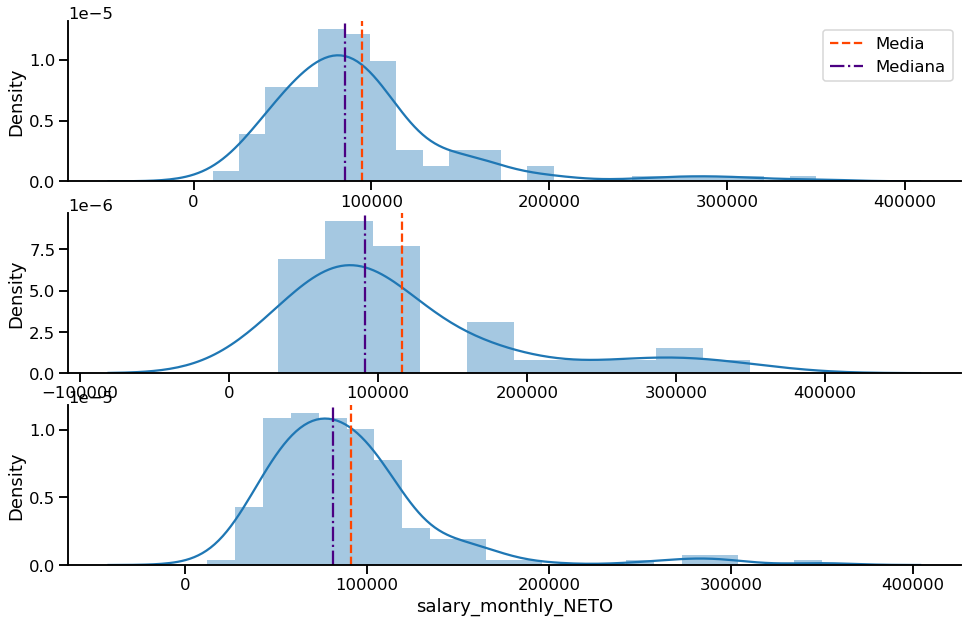

In [39]:
#Aquí ploteamos, una debajo de otra, las tres distirbuciones

#¡ATENCIÓN!! FALTA QUE EN EL GRÁFICO DIGA QUÉ GRÁFICO ES DE QUÉ GRUPO 

fig, axes = plt.subplots(nrows=3, figsize=(16, 10))

df_curado2_python = df_curado2[df_curado2['programming_language']=='python']
seaborn.distplot(df_curado2_python.salary_monthly_NETO, ax=axes[0])
axes[0].axvline(df_curado2_python.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df_curado2_python.salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')

df_curado2_r = df_curado2[df_curado2['programming_language']=='r']
seaborn.distplot(df_curado2_r.salary_monthly_NETO, ax=axes[1])
axes[1].axvline(df_curado2_r.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(df_curado2_r.salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')

df_curado2_sql = df_curado2[df_curado2['programming_language']=='sql']
seaborn.distplot(df_curado2_sql.salary_monthly_NETO, ax=axes[2])
axes[2].axvline(df_curado2_sql.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df_curado2_sql.salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

Efectivamente, **las medidas de tendencia central de los grupos que programan en Python y en SQL son similares** y, en alguna medida, también lo son sus distribuciones. 

Sin embargo, el grupo que **programa en python tiene una mayor concentración de casos alrededor de la media**, mientras que el grupo que **programa en Sql muestra una mayor asimetría positiva**. 

Por su parte, **el grupo que programa en R es efectivamente el que muestra mayor dispersión en los datos**, pero casi no tiene casos en los segmentos de menor salario y, además de tener una media y una mediana más alta, **es el que tiene mayor cantidad de casos en niveles de salario superiores a 200 mil**. 


En principio -si bien es poco probable para la muestra en general- **parece más probable ganar más de 200 mil pesos si programas en R** que si programas en cualquiera de los otros dos lenguajes. 

### GRÁFICO DE DENSIDAD

Para contrastar las 3 distribuciones elegimos un gráficos de densidad porque **permite visualizar mejor la distribución de los datos**, siendo menos afectada por la cantidad de bins como sucede con el histograma. 

Además, configuramos **"common_norm=False"** porque tenemos **grupos de tamaños muy desiguales** y si se escalara cada densidad condicional por el número de observadiones de modo tal que todas las densidades en conjunto sumaran 1, nos costaría interpretar las diferencias. De este modo, **el área debajo de cada densidad (para cada grupo) suma 1**, de modo que se normaliza cada densidad de modo independiente. 


<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Density'>

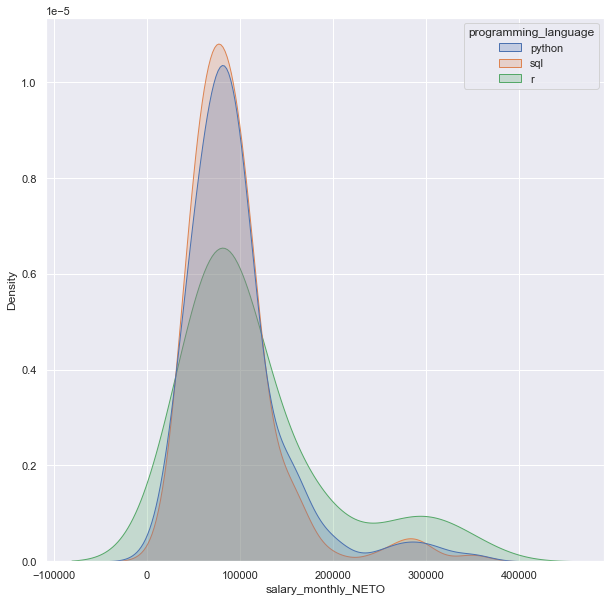

In [100]:
#ATENCIÓN: NOTA PARA NOSOTRES. Cambié el gráfico usando una sola línea de código, porque de otro modo no podría poner la leyenda
seaborn.set(style="darkgrid")

seaborn.kdeplot(data=df_curado2, x="salary_monthly_NETO", hue="programming_language", common_norm=False, shade=True)

### CONCLUSIONES

Aun teniendo en cuenta que las mismas personas pueden estar formando parte de más de un grupo, encontrar diferencias entre estos puede ser importante: **si el grupo de personas que programa en R tiene mayor densidad en el extremo superior de la escala de salario, no es posible que -además- programaran en los otros dos lenguajes (sino todas las colas se parecerían)**.

**Si bien las diferencias no son enormes, son atendibles**... quizás sea interesante estudiar de qué va R.

Un dato adicional, **las y los cientitas de datos ganan un poquito más que el promedio de toda la muestra**, ¿sorprendente no?

¿Cómo lo sabemos? Hicismos el siguiente análisis...

In [85]:
salary_analistas = df_role.salary_monthly_NETO
avg_salary_analistas = salary_analistas.mean()

salary_all = df.salary_monthly_NETO
avg_salary_all = salary_all.mean()
avg_salary_analistas, avg_salary_all

(98064.35896654276, 94907.9491018188)

**La diferencia es pequeña pero pronto podremos hacer prueba de diferencias de medias para ver si es suficiente como para considerarla significativa**. 

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [ ]:
#categorica: genero y violencia
#nuerica: salario neto, personas a cargo, años de experiencia

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


In [ ]:
#categorica: genero
#numerica: personas a cargo, años de experiencia